In [ ]:
# Descomentar para actualizar librerias
# Si se actualiza alguna libreria hay que reiniciar el notebook
#!pip install numpy
#!pip install pandas --upgrade  --quiet
#!pip install scipy --upgrade  --quiet
#!pip install statsmodels --upgrade  --quiet
#!pip install scikit-learn --upgrade  --quiet
#!pip install seaborn --upgrade  --quiet
#!pip install missingno --upgrade  --quiet
#!pip install apafib --upgrade --quiet

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time
from datetime import timedelta
init_time = time()

# 1. Descripción del problema y los datos
El conjunto de datos escogido contiene información acerca de las ventas de coches y sus características en Australia en el año 2023. Los datos provienen de [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/australian-vehicle-prices/data). <br>
El objetivo de la resolución del problema es ser capaces de predecir el precio de un coche australiano en base a sus características, definimos el problema como un problema de regresión y la variable objetivo es el precio del coche.<br>
El conjunto de datos contiene 19 variables (12 categóricas y 7 numéricas) que representan las características del coche y 16734 instancias de coches australianos.<br>


In [3]:
import pandas as pd

#df = pd.read_csv("/content/drive/MyDrive/APA_VEHICLES.csv")
df = pd.read_csv("APA_VEHICLES.csv")
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [4]:
df.shape

(16734, 19)

In [5]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [6]:
df.dtypes

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object

# 2. Transformación de los datos
Dado que tenemos variables numéricas guardadas como object debemos transformarlas a numéricas y las categóricas como object a category.<br>
Antes analizamos el tipo de valores que toman para poder transformarlos:

In [7]:
df['FuelConsumption'].unique()

array(['8.7 L / 100 km', '6.7 L / 100 km', '6.6 L / 100 km',
       '11 L / 100 km', '6 L / 100 km', '-', '5.1 L / 100 km',
       '8 L / 100 km', '7.1 L / 100 km', '4.5 L / 100 km',
       '9.8 L / 100 km', '6.2 L / 100 km', '5.6 L / 100 km',
       '5.4 L / 100 km', '7.5 L / 100 km', '6.1 L / 100 km',
       '8.4 L / 100 km', '5.8 L / 100 km', '4.7 L / 100 km',
       '7.9 L / 100 km', '8.2 L / 100 km', '6.9 L / 100 km',
       '8.1 L / 100 km', '4.2 L / 100 km', '7.7 L / 100 km',
       '9.1 L / 100 km', '0 L / 100 km', '7.4 L / 100 km',
       '7.6 L / 100 km', '7.8 L / 100 km', '9.9 L / 100 km',
       '10.9 L / 100 km', '9.6 L / 100 km', '10 L / 100 km',
       '8.8 L / 100 km', '6.4 L / 100 km', '8.9 L / 100 km',
       '9 L / 100 km', '6.3 L / 100 km', '10.4 L / 100 km',
       '7.2 L / 100 km', '5.5 L / 100 km', '14.5 L / 100 km',
       '5.9 L / 100 km', '9.3 L / 100 km', '11.5 L / 100 km',
       '7.3 L / 100 km', '9.2 L / 100 km', '4.8 L / 100 km',
       '10.1 L / 100 km',

In [8]:
df['FuelConsumption'] = pd.to_numeric(df['FuelConsumption'].str.extract(r'(\d+\.?\d*)\s*L')[0], errors='coerce')

In [9]:
print(df['Kilometres'].unique())
print(df['Price'].unique())
print(df['Doors'].unique())
print(df['Seats'].unique())

['5595' '16' '8472' ... '5165' '85525' '31852']
['51990' '19990' '108988' ... '21989' '36770' '35280']
[' 4 Doors' ' 5 Doors' ' 2 Doors' nan ' 3 Doors' ' 7 Seats' ' 5 Seats'
 ' 4 Seats' ' 8 Seats' ' 2 Seats' ' 9 Seats' ' 6 Seats' ' 3 Seats'
 ' 12 Seats']
[' 7 Seats' ' 5 Seats' ' 4 Seats' nan ' 2 Seats' ' 3 Seats' ' 14 Seats'
 ' 8 Seats' ' 6 Seats' ' 9 Seats' ' 11 Seats' ' 12 Seats' ' 22 Seats'
 ' 15 Seats']


In [10]:
df['Doors'] = pd.to_numeric(df['Doors'].str.extract(r'(\d+\.?\d*)\s*D')[0], errors='coerce')
df['Seats'] = pd.to_numeric(df['Seats'].str.extract(r'(\d+\.?\d*)\s*S')[0], errors='coerce')

numericalCols = ['Kilometres', 'Price']
for col in numericalCols:
   df[col] = pd.to_numeric(df[col], errors='coerce')

In [11]:
df['CylindersinEngine'].unique()

array(['4 cyl', '8 cyl', '-', '3 cyl', '6 cyl', '5 cyl', '12 cyl', '0 L',
       '2 cyl', nan, '10 cyl', '2 L'], dtype=object)

Dado que hay valores en CylindersinEngine que no tienen sentido (0L, 2L) los trataremos como missings

In [12]:
df['CylindersinEngine'] = pd.to_numeric(df['CylindersinEngine'].str.extract(r'(\d+\.?\d*)\s*c')[0], errors='coerce')

In [13]:
categoricalCols = ['Brand', 'Model', 'Car/Suv', 'Title', 'UsedOrNew','Transmission', 'Engine', 'DriveType', 'FuelType','ColourExtInt', 'Location','BodyType']
for col in categoricalCols:
  df[col] = df[col].astype('category')

In [14]:
df.dtypes

Brand                category
Year                  float64
Model                category
Car/Suv              category
Title                category
UsedOrNew            category
Transmission         category
Engine               category
DriveType            category
FuelType             category
FuelConsumption       float64
Kilometres            float64
ColourExtInt         category
Location             category
CylindersinEngine     float64
BodyType             category
Doors                 float64
Seats                 float64
Price                 float64
dtype: object

# 3. Visualización de los datos

In [15]:
df.describe()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
count,16733.000000,15036.000000,16142.000000,14952.000000,15059.000000,15029.000000,1.668100e+04
mean,2016.229248,7.663661,100096.109714,4.455123,4.005047,5.101404,3.730333e+04
std,5.247705,2.324609,78213.114589,1.060534,0.693097,1.119178,3.717787e+04
min,1940.000000,0.000000,1.000000,2.000000,2.000000,2.000000,8.800000e+01
25%,2013.000000,6.500000,40757.000000,4.000000,4.000000,5.000000,1.899900e+04
50%,2017.000000,7.600000,85951.500000,4.000000,4.000000,5.000000,2.950000e+04
75%,2020.000000,8.800000,146544.500000,4.000000,4.000000,5.000000,4.399000e+04
max,2023.000000,27.000000,533849.000000,12.000000,5.000000,22.000000,1.500000e+06


Una vez transformados los datos podemos ver el número real de missings de nuestro dataset

In [16]:
df.isna().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption      1698
Kilometres            592
ColourExtInt            1
Location              450
CylindersinEngine    1782
BodyType              282
Doors                1675
Seats                1705
Price                  53
dtype: int64

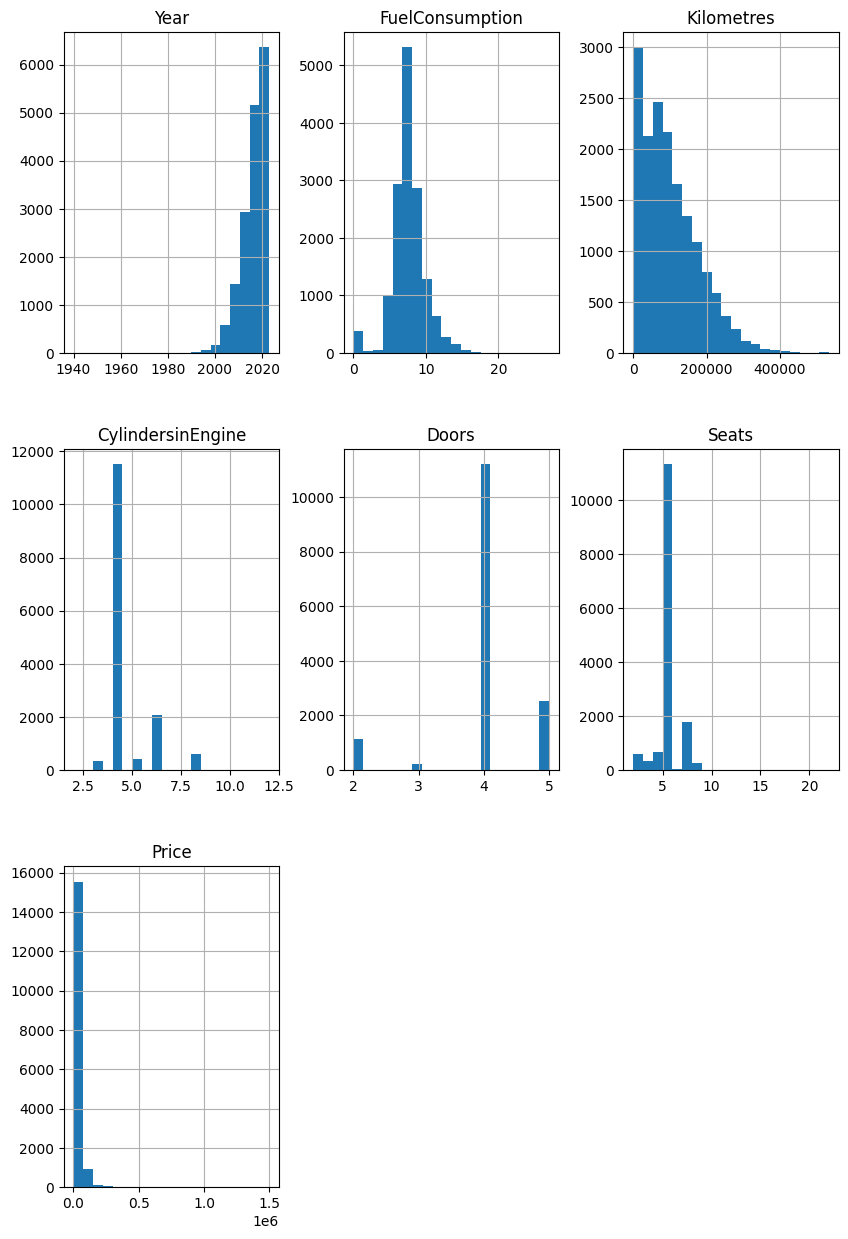

In [17]:
df.hist(bins=20, figsize=(10,15));

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plotXY(df:pd.DataFrame, colX:str, colY:str):
  plt.figure(figsize=(10, 5))
  sns.scatterplot(x=colX, y=colY, data=df)
  plt.title(f'{colX} vs {colY}')
  plt.xlabel(colX)
  plt.ylabel(colY)
  plt.axhline(y=0.5, color='r', linestyle='--')
  plt.show()

Podemos realizar un gráfico con cada variable predictora numérica y la variable respuesta para ver si existe algun tipo de correlación:

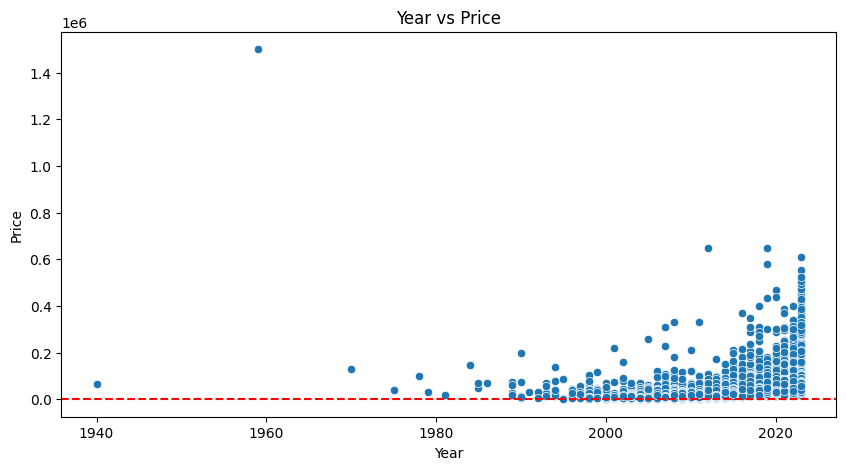

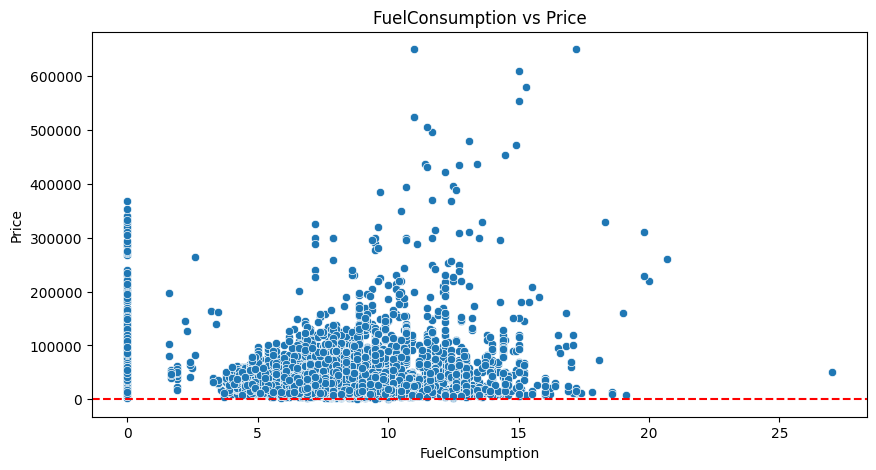

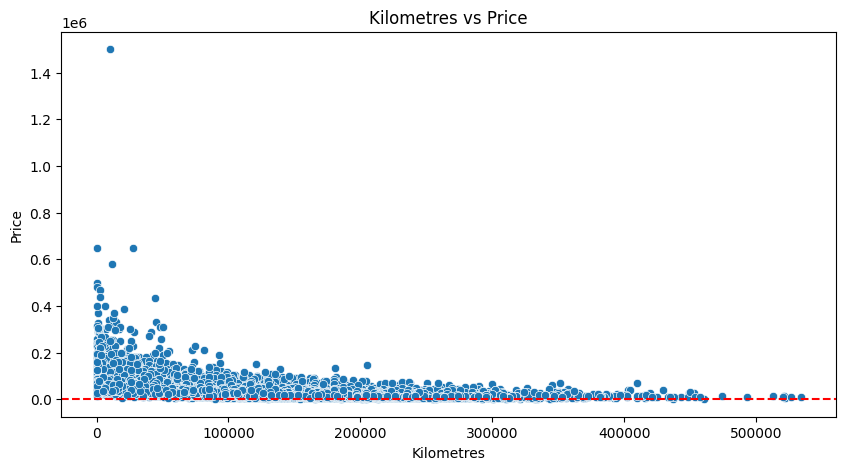

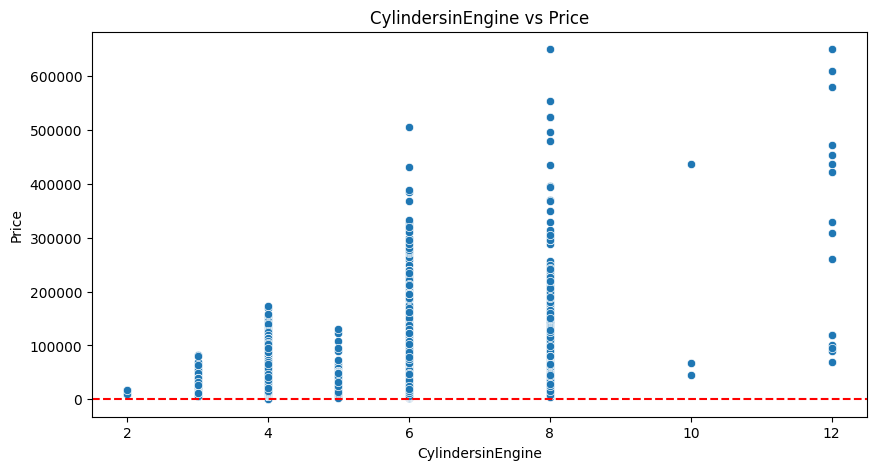

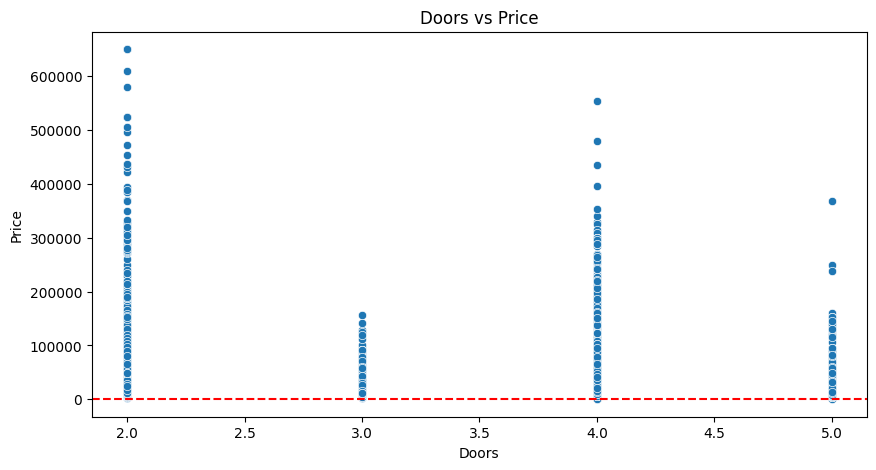

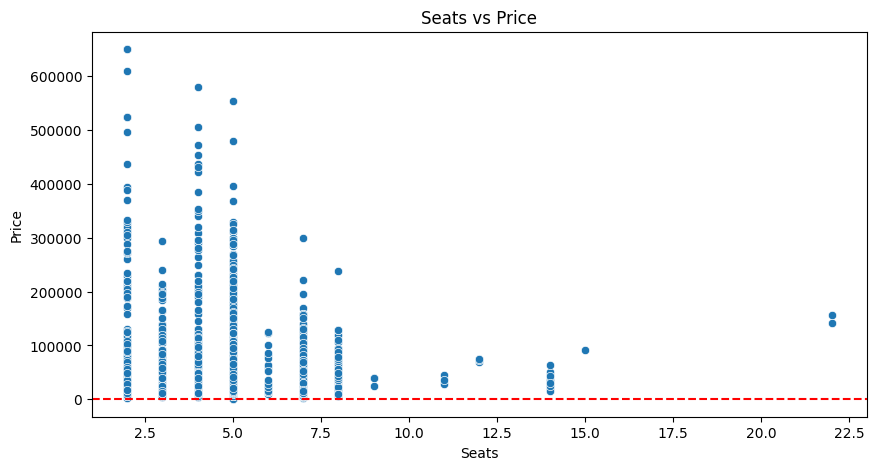

In [19]:
numericalCols = ['Year','FuelConsumption','Kilometres','CylindersinEngine','Doors','Seats']
for col in numericalCols:
  plotXY(df,col,'Price')

A priori no se observan fuertes correlaciones entre las variables predictoras y el precio del vehículo.
<br>Visualizamos la matriz de correlación

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Matriz de Correlación entre variables numéricas')

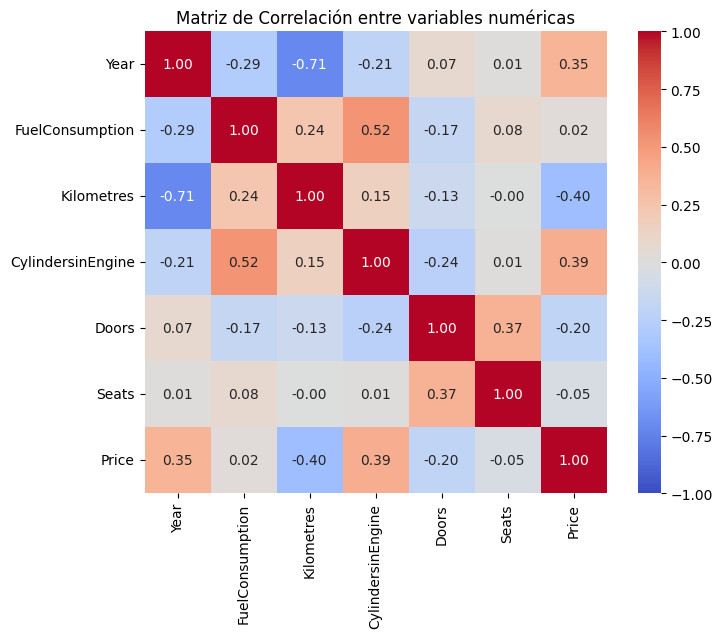

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", square=True)
plt.title("Matriz de Correlación entre variables numéricas")
plt.show()

Lo primero que vemos es que ninguna de las variables predictoras está muy correlacionada con el precio del vehículo (variable respuesta), la que más lo está (inversamente correlacionada) son los kilómetros del vehículo (lo cuál es de esperar) y el número de cilindros del motor.<br>
Otro dato interesante es la correlación inversa de -0.71 entre el año del vehículo y los kilómetros del mismo (si el año es más reciente tiene sentido que tenga menos kilómetros y viceversa).<br>
Por último destacar la correlación de 0.52 entre la consumición de combustible y el número de cilindros del motor.


# 4. Modelo de prueba
Vamos a preparar los datos para un modelo de regresión lineal para ver si el conjunto es demasiado fácil

In [21]:
from sklearn.preprocessing import MinMaxScaler


from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def categorical_preprocessing(X, y, scaler=None):
    print('Original shape:{}'.format(X.shape))
    
    # Identificamos las columnas categóricas y numéricas
    categorical_columns = X.dtypes[X.dtypes == 'category'].index.values
    numerical_columns = [c for c in X.columns if c not in categorical_columns]
    
    # Escalamos las variables numéricas
    if scaler is None: 
        scaler = MinMaxScaler()
        X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    else: 
        X[numerical_columns] = scaler.transform(X[numerical_columns])
    
    # Aplicamos Label Encoding a las variables categóricas
    for column in categorical_columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
    
    # Eliminamos los valores perdidos
    X = X.dropna()
    y = y[X.index]
    print('New shape:{}'.format(X.shape))
    
    return X, y, scaler



In [22]:
from sklearn.model_selection import train_test_split

df = df.dropna()
X = df.drop(columns=['Price'])
y = df["Price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, y_train, scaler = categorical_preprocessing(X_train,y_train)
X_test, y_test, _ = categorical_preprocessing(X_test,y_test,scaler)

Original shape:(9624, 18)
New shape:(9624, 18)
Original shape:(4741, 18)
New shape:(4741, 18)


In [23]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

results: pd.DataFrame = pd.DataFrame(columns=["MSE", "R2_SCORE", "NORM_MSE", "MAE"])

def addResults(prediction: pd.DataFrame, modelName: str):
    # MSE
    mse = root_mean_squared_error(y_test, prediction)**2
    # R2
    r2 = r2_score(y_test, prediction)
    # Normalized MSE
    nmse = 1 - r2
    # MAE
    mae = mean_absolute_error(y_test, prediction)

    results.loc[modelName, :] = [mse, r2, nmse, mae]

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model_result = model.fit(X_train, y_train)
model_prediction = model_result.predict(X_test)
model_prediction = model_prediction.reshape(-1,1)
addResults(model_prediction, "LinearRegression")

In [25]:
results

,MSE,R2_SCORE,NORM_MSE,MAE
LinearRegression,578422453.601097,0.38171,0.61829,12687.227817


Como podemos observar la variancia explicada por el modelo es bastante pobre (solo el 38%). Pero teniendo en cuenta el preproceso super simple que hemos hecho, creemos que tenemos mucho margen de mejora